# Prediction of a Breast Tumor 



In [1]:
import numpy as np        
import pandas as pd        
# Read the file "data.csv" and print the contents.

data = pd.read_csv('data/data.csv', index_col=False,)

#### Inspecting the data
The first step is to visually inspect the new data set.


In [3]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [4]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
data.shape

(569, 31)

In the result displayed, you can see the data has 569 records, each with 32 columns.

The **“info()”** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

The method **get_dtype_counts()** will return the number of columns of each type in a DataFrame:

In [6]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Review number of columns of each data type in a DataFrame:
data.dtypes.value_counts()

float64    30
object      1
dtype: int64

From the above results, from the 32, variables,column id number 1 is an integer, diagnosis 569 non-null object. and rest are float. More on [python variables](https://www.tutorialspoint.com/python/python_variable_types.htm)

In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.



In [9]:
#save the cleaner version of dataframe for future analyis
data.to_csv('data/clean-data.csv')

> ### Exploratory Data Analysis
Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.



In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [11]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head(2)

In [12]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
data.skew()

C:\Users\Arnab jyoti borah\AppData\Local\Temp\ipykernel_20180\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [14]:
# The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [15]:
### From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

In [16]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


In [18]:
 ### Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where

# Malignant = 1 (indicates prescence of cancer cells)
# Benign = 0 (indicates abscence)
# Observation
# 357 observations indicating the absence of cancer cells and 212 show absence of cancer cell



In [19]:
# Data Visualization

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

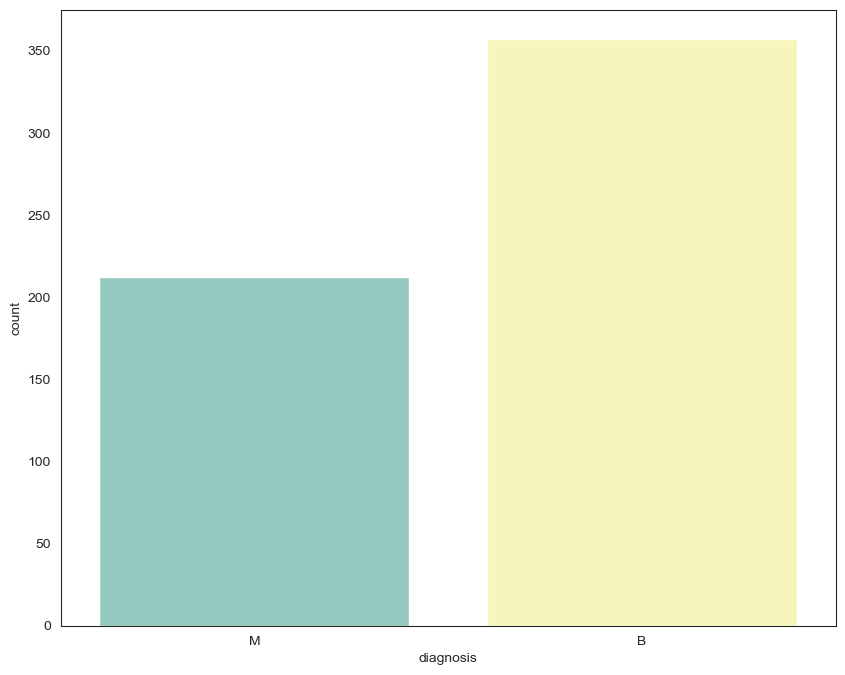

In [20]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [21]:
# Visualize distribution of data via density plots

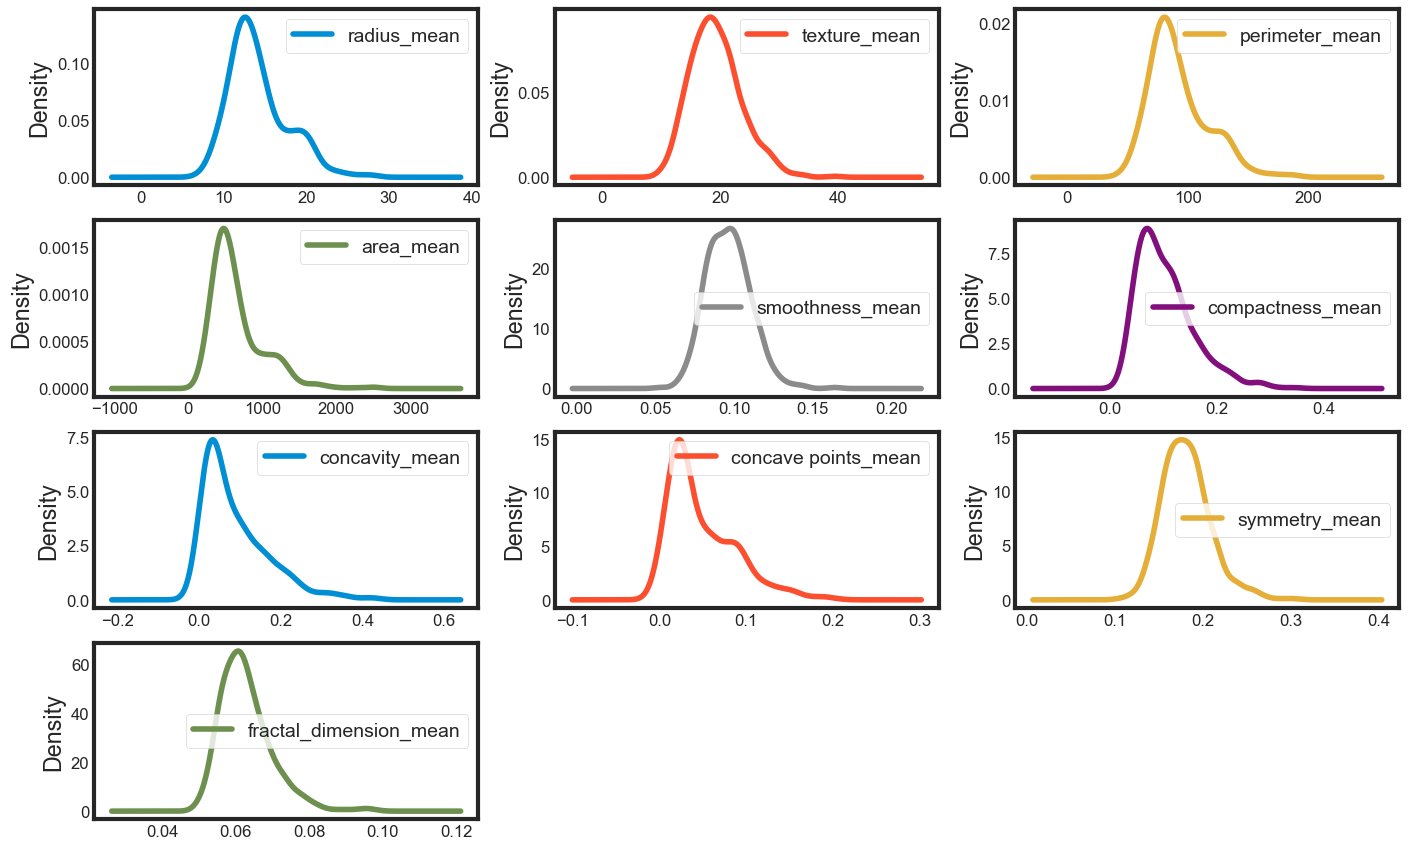

In [26]:
data_mean=data.iloc[:,1:11]
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


C:\Users\Arnab jyoti borah\AppData\Local\Temp\ipykernel_20180\3505804637.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

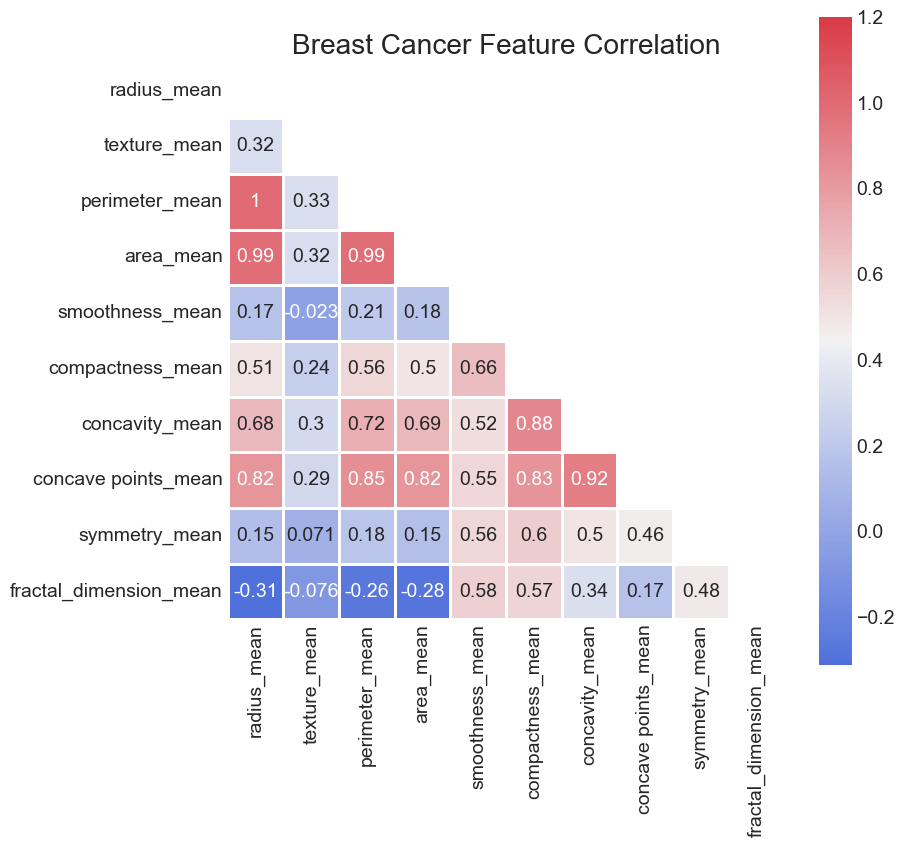

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

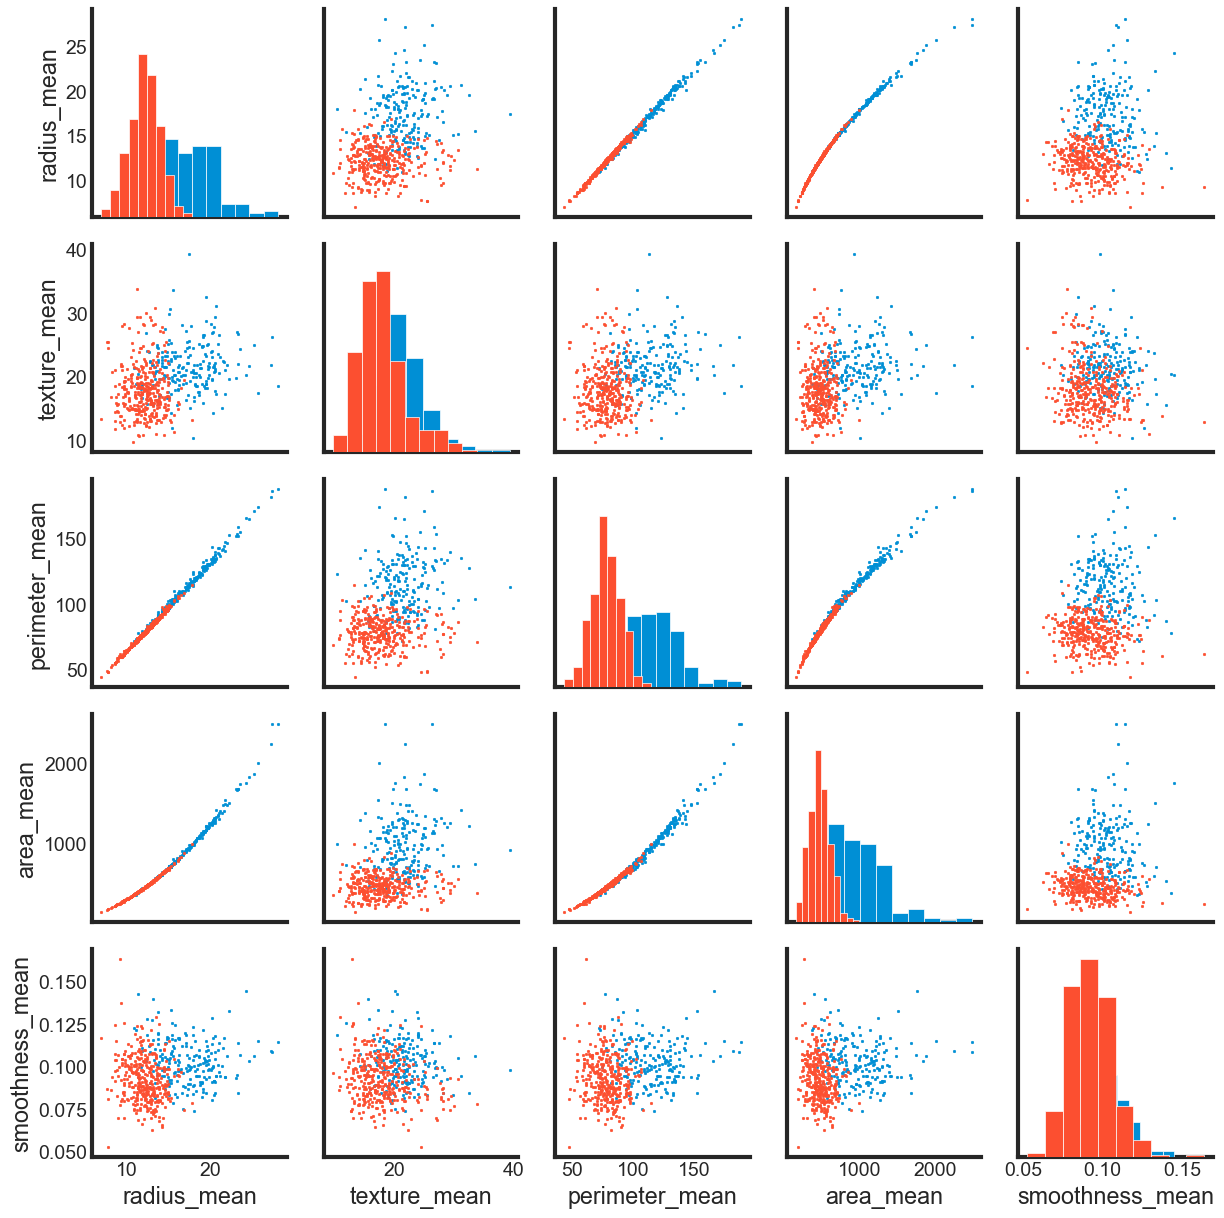

In [28]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/clean-data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [29]:
# Summary
# Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

# mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.


## Pre-Processing the data

### Goal:
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 

#### Load data and essential libraries

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

#### Label encoding
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [31]:
array = data.values
X = array[:,1:31]
y = array[:,0]

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively*, illustrated by calling the transform method of LabelEncorder on two dummy variables.**


#### Assesing Model Accuracy: Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will
* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part and 
* evaluate the predictions against the expected results. 

The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.


In [33]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [34]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

#### Feature decomposition using Principal Component Analysis(  PCA)

In [35]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

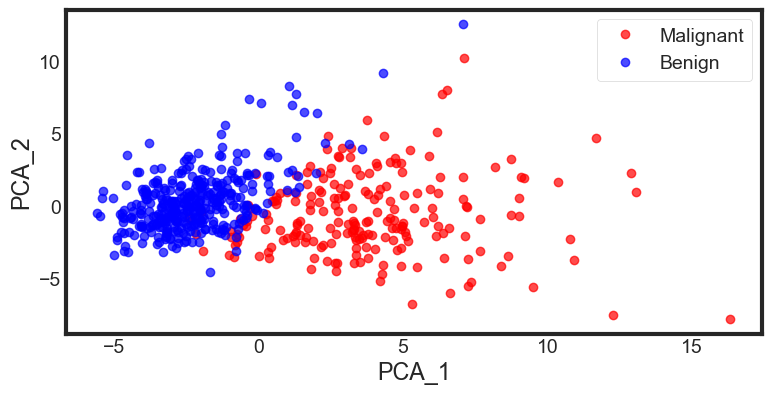

In [36]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [37]:
var= pca.explained_variance_ratio_

AttributeError: 'Legend' object has no attribute 'draggable'

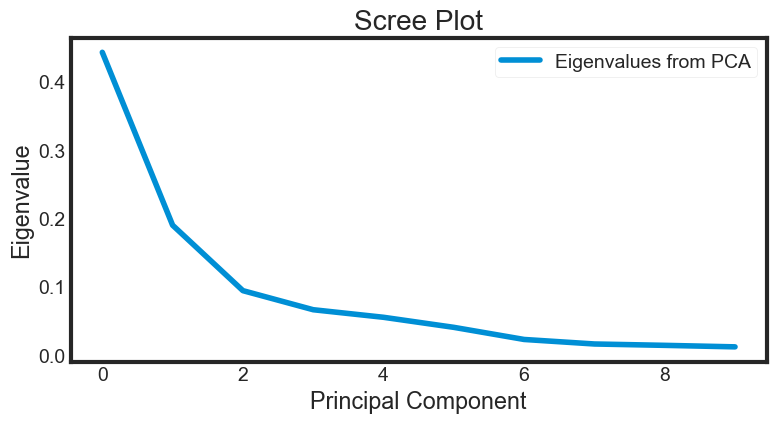

In [38]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

### A Summary of the Data Preprocing Approach used here:

1. assign features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers
2. Split data into training and test sets
3. Standardize the data.
4. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix
5. Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤dk≤d).
6. Construct the projection matrix W from the selected k eigenvectors.
7. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.


### Predictive model using Support Vector Machine (SVM)

### Important Parameters
The important parameters in kernel SVMs are the
* Regularization parameter C, 
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters. 

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

In [40]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

In [41]:
array = data.values
X = array[:,1:31] # features
y = array[:,0]

#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [42]:
# CROSS VALIDATION

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ("\nThe classifier accuracy score is {:03.2f}\n".format(classifier_score))


The classifier accuracy score is 0.95



In [44]:
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



In [45]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



In [46]:
print (scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
Average score and uncertainty: (94.20 +- 0.496)%


In [47]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

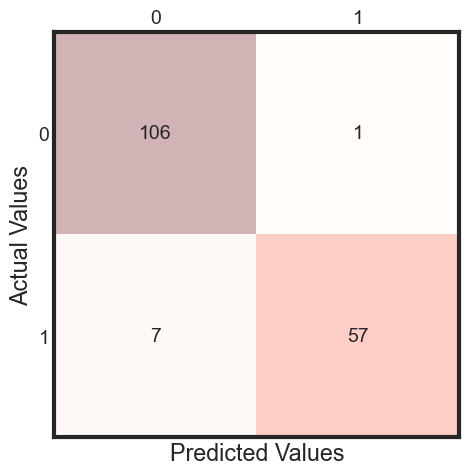

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

#### Observation 
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign
= 0 (indicates abscence).

* The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
* Out of those 174 cases, the classifier predicted "yes" 58 times, and "no" 113 times.
* In reality, 64 patients in the sample have the disease, and 107 patients do not.

#### Rates as computed from the confusion matrix
1. **Accuracy**: Overall, how often is the classifier correct?
    * (TP+TN)/total = (57+106)/171 = 0.95

2. **Misclassification Rate**: Overall, how often is it wrong?
    * (FP+FN)/total = (1+7)/171 = 0.05 equivalent to 1 minus Accuracy also known as ***"Error Rate"***

3. **True Positive Rate:** When it's actually yes, how often does it predict 1?
   * TP/actual yes = 57/64 = 0.89 also known as "Sensitivity" or ***"Recall"***

4. **False Positive Rate**: When it's actually 0, how often does it predict 1?
   * FP/actual no = 1/107 = 0.01

5. **Specificity**: When it's actually 0, how often does it predict 0? also know as **true positive rate**
   * TN/actual no = 106/107 = 0.99 equivalent to 1 minus False Positive Rate

6. **Precision**: When it predicts 1, how often is it correct?
   * TP/predicted yes = 57/58 = 0.98

7. **Prevalence**: How often does the yes condition actually occur in our sample?
   * actual yes/total = 64/171 = 0.34

